# Convergence

It is fundamentally important to keep track of the convergence of an algorithm. Convergence graphs visualize the improvement over time, which is vital to evaluate how good the algorithm performance or what algorithms perform better. In pymoo different ways of tracking the performance exists. One is to store the whole algorithms run using the `save_history` flag and extract the necessary information for post-processing. Since history includes a deep copy, this can become memory intensive if many iterations are run. An alternative is to use a `Callback` object to just store the information needed and use them later on for plotting. Both ways are explained in the following for an unconstrained single-objective problem. Please bear in mind if your optimization problem has constraints or more than one objective, this needs to be addressed in the convergence curve (for instance, via plotting the `CV`, too, or using multi-objective optimization performance metrics). 

## History

Run your algorithm on the corresponding problem and make sure the `save_history` flag is enabled when calling the `minimize` function.

In [1]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("ackley")
algorithm = GA()

res = minimize(problem,
               algorithm,
               termination=('n_gen', 50),
               seed=1,
               save_history=True)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



This creates a deep copy of the algorithm in each generation.

In [2]:
len(res.history)

50

This might be even more data than necessary and, therefore, not always the most memory-efficient method to use. However, if the number of generations is only a few hundred and the `problem` and `algorithm` objects do not contain a large amount of data, this shall be not a big deal. Using the history, we can extract the number of function evaluations and the optimum stored in the algorithm object at each generation/iteration. The `algorithm` object has the attribute `opt` (a `Population` object), which contains the current optimum. For single-objective algorithms, this is known to be only a **single** solution.

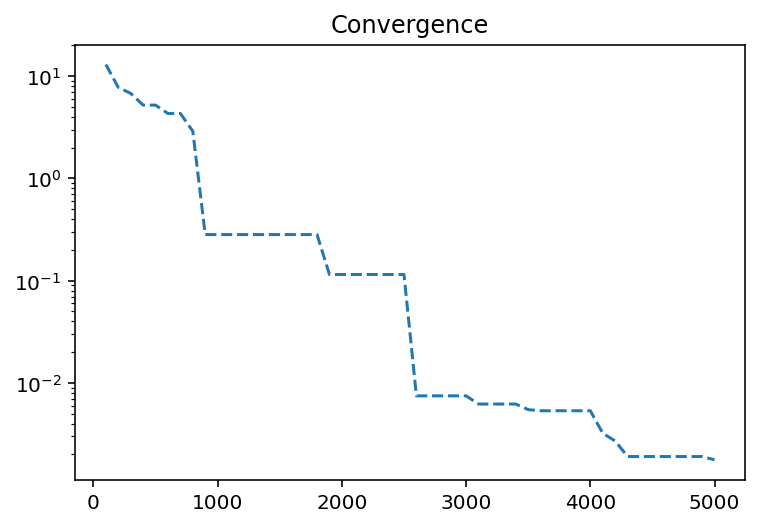

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

plt.title("Convergence")
plt.plot(n_evals, opt, "--")
plt.yscale("log")
plt.show()

## Callback

Another way is to define a `Callback` object, which stores the information necessary to plot the convergence.
Make sure to pass the object to the `minimize` function to get the notifications each iteration of the algorithm.

In [4]:
from pymoo.algorithms.so_genetic_algorithm import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.model.callback import Callback

class MyCallback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.n_evals = []
        self.opt = []

    def notify(self, algorithm):
        self.n_evals.append(algorithm.evaluator.n_eval)
        self.opt.append(algorithm.opt[0].F)


problem = get_problem("ackley")
algorithm = GA()
callback = MyCallback()

res = minimize(problem,
               algorithm,
               callback=callback,
               termination=('n_gen', 50),
               seed=1)

Now the `callback` object contains the information of each generation which can be used for plotting.

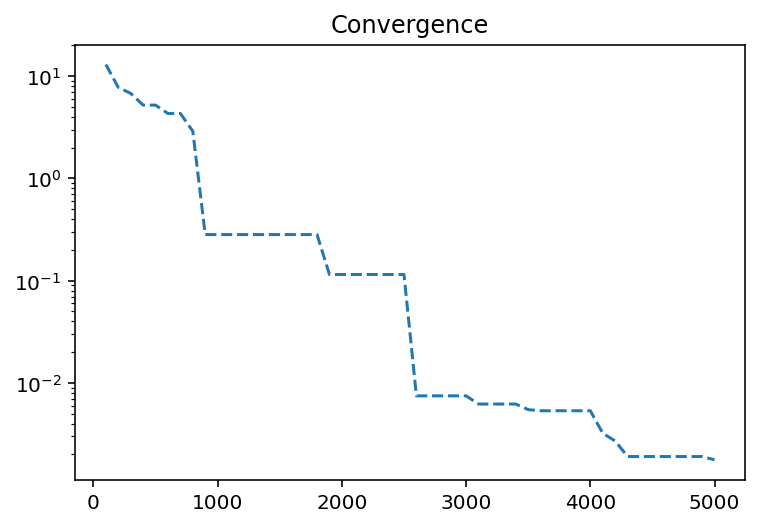

In [5]:
plt.title("Convergence")
plt.plot(callback.n_evals, callback.opt, "--")
plt.yscale("log")
plt.show()